 # **Customer Segmentation Using K-Means Clustering on Retail Purchase Data**

R42YMNGVVRKW7JC7WRQKJDX3G4.avif

# **🔹 Objective:**
To implement a K-Means clustering algorithm that segments customers of a retail store based on their purchase history, enabling data-driven marketing and personalized service strategies.



# **About Dataset**

This dataset, sourced from Kaggle, was created for educational purposes to demonstrate customer segmentation—a fundamental concept in marketing analytics and unsupervised machine learning.

The data simulates a retail scenario where a supermarket mall collects information about its customers through membership cards. The dataset includes the following customer attributes:

CustomerID – A unique identifier for each customer

Gender – Male or Female

Age – Customer's age in years

Annual Income (k$) – Estimated yearly income

Spending Score (1-100) – A score assigned to customers based on purchasing behavior and other parameters set by the business

The primary goal is to apply K-Means clustering to segment customers into distinct groups based on their income and spending patterns, enabling targeted marketing and strategic decision-making.

**Dataset Refrence:** https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

# **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Load the Dataset**

In [ ]:
data = pd.read_csv('C:/Users/CB/Desktop/Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Data Preprocessing**

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

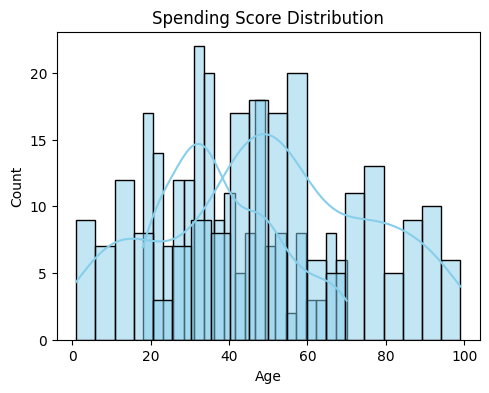

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')


plt.subplot(1, 2, 1)
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True,color='skyblue')
plt.title('Spending Score Distribution')
plt.show()

In [ ]:
# Select Relevant Features

features= data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
features.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [ ]:
# Normalize the Data
scaler= StandardScaler()

scaled_data = scaler.fit_transform(features)
scaled_data

array([[-1.73899919, -0.43480148, -1.42456879],
       [-1.73899919,  1.19570407, -1.28103541],
       [-1.70082976, -1.71591298, -1.3528021 ],
       [-1.70082976,  1.04041783, -1.13750203],
       [-1.66266033, -0.39597992, -0.56336851],
       [-1.66266033,  1.00159627, -1.20926872],
       [-1.62449091, -1.71591298, -0.27630176],
       [-1.62449091,  1.70038436, -1.13750203],
       [-1.58632148, -1.83237767,  1.80493225],
       [-1.58632148,  0.84631002, -0.6351352 ],
       [-1.58632148, -1.4053405 ,  2.02023231],
       [-1.58632148,  1.89449216, -0.27630176],
       [-1.54815205, -1.36651894,  1.37433211],
       [-1.54815205,  1.04041783, -1.06573534],
       [-1.54815205, -1.44416206, -0.13276838],
       [-1.54815205,  1.11806095, -1.20926872],
       [-1.50998262, -0.59008772, -0.27630176],
       [-1.50998262,  0.61338066, -1.3528021 ],
       [-1.43364376, -0.82301709,  0.94373197],
       [-1.43364376,  1.8556706 , -0.27630176],
       [-1.39547433, -0.59008772, -0.276

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

In [ ]:
# Convert PCA result to DataFrame with correct column names
data_frame = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
data_frame.head()


,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740


<Axes: >

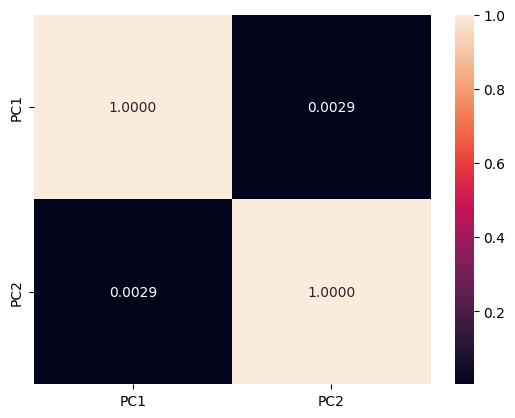

In [ ]:
corr_matrix = data_frame.corr(method='spearman')
sns.heatmap(data=corr_matrix, annot=True, fmt='.4f')


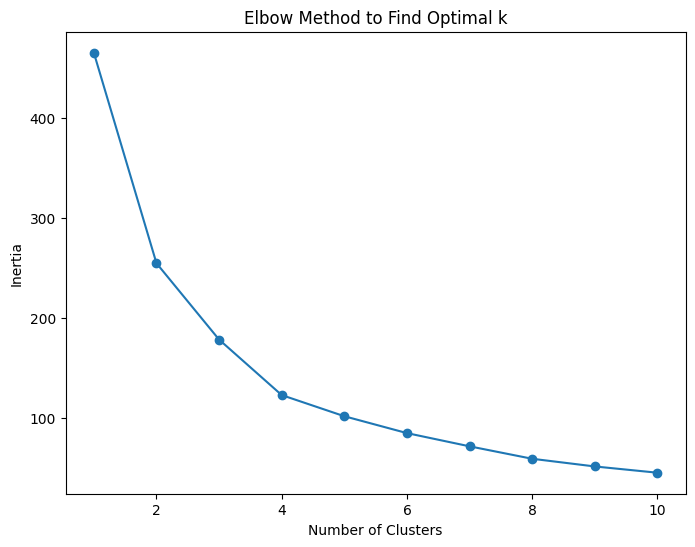

In [ ]:
# Finding the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):  # Check k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_frame)
    inertia.append(kmeans.inertia_)  # Inertia is the sum of squared distances to centroids

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Find Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Apply KMeans with optimal k (e.g., 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_frame)

In [ ]:
model = KMeans(n_clusters=3,n_init='auto',random_state=23) # initialize the K-Means
model.fit(data_frame) # fit the model to the dataset
predictions = model.predict(data_frame) # Assign each data point in X to a cluster

In [ ]:
# Getting the cluster centers (centroids)
centroids = model.cluster_centers_
print(centroids)

[[-1.07674066 -0.02332495]
 [ 0.96358676 -0.52297568]
 [ 0.99540827  1.10926194]]


In [ ]:
data_frame['Cluster'] = predictions
data_frame.head(30)  # Display the first thirty rows with the assigned cluster labels

,PC1,PC2,Cluster
0,-0.615720,-1.763481,0
1,-1.665793,-1.820747,0
2,0.337862,-1.674799,1
3,-1.456573,-1.772430,0
4,-0.038465,-1.662740,1
5,-1.481685,-1.735002,0
6,1.094617,-1.566102,1
7,-1.926307,-1.721110,0
8,2.645178,-1.460847,1
9,-0.970131,-1.635581,0


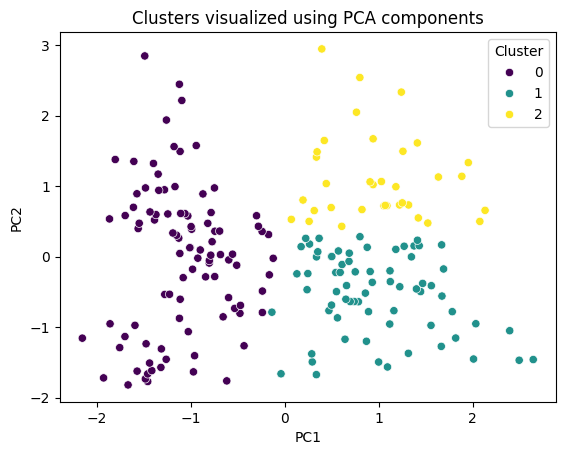

In [ ]:
# Add predictions (cluster labels) to the PCA dataframe
data_frame['Cluster'] = predictions

# Plot PCA-transformed features
sns.scatterplot(data=data_frame, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Clusters visualized using PCA components')
plt.show()


In [ ]:
# Calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_frame.drop(columns=['Cluster']), data_frame['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3850194889047295


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)
score = silhouette_score(X_pca, labels)
print(f"DBSCAN Silhouette Score: {score}")


DBSCAN Silhouette Score: 0.32031182881756953


# **Conclusion**

In this project, I explored customer segmentation using the K-Means clustering algorithm on retail purchase data. I began by preprocessing and standardizing the data, followed by applying PCA for dimensionality reduction to aid in visualization. Using the Elbow Method and silhouette scores, I identified the optimal number of clusters for the dataset.

I discovered that K-Means clustering effectively grouped customers into distinct segments based on their purchasing behavior. I also experimented with DBSCAN for comparison, but K-Means produced more meaningful and interpretable clusters for this particular dataset.

Overall, this project deepened my understanding of unsupervised learning techniques and demonstrated how clustering can reveal hidden patterns in customer data.

💡 Business Insights and Strategic Recommendations
Customer Segments Identified
I found that the data could be segmented into distinct customer groups — such as high spenders, moderate shoppers, and occasional buyers. These insights can help a business tailor its marketing strategies more effectively.

High-Value Customers
One cluster stood out as containing high-spending customers. This segment is crucial for profitability, so I would recommend focusing retention efforts here through loyalty programs, exclusive deals, or personalized communication.

At-Risk Customers
I noticed a segment of customers with low or infrequent purchase activity. These users might be at risk of churning, so targeted re-engagement campaigns could help bring them back.

Data-Driven Personalization
With these clusters, businesses can personalize product recommendations, offers, and communication strategies based on each group's preferences and behaviors.

Suggestions for Future Analysis
I would like to extend this project by incorporating time-based patterns or seasonal trends in customer behavior. It could also be valuable to integrate demographic or geographic data for deeper segmentation insights.



# **Author's Details:**

Author: Ugbovo Yoma

Email: ugbovoyoma@gmail.com

Linkedin: https://www.linkedin.com/in/ugbovoyoma/